
# Project: Investigate a Dataset : No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> This analysis is based on the kaggle Medical Appointment No-Show Dateset collect in brazil. In this project we will be finding features of those patience who shows up for appointment and why they differ from those that did not show up for their appointment
This dataset shows different kind of people who have appointment with the doctor and indicate weather they show up or now.
Here are the list Of columns and their significance
<ul>
    <li>PatientId : Identification of each Patience </li>
    <li>AppointmentID: Indenfication of each appointment</li>
     <li>Gender: Sex of the patient where F is female and M is Male</li>
    <li>ScheduledDay: The Day in which they are called or assigned to visit the doctor before appointment day </li>
    <li>AppointmentDay: The day in which the patient need to see the doctor </li>
    <li>Age: The age of the patient </li>
    <li>Neighbourhood: The place where appoint will take place  </li>
    <li>Scholarship: This is True(1) if the patient is on medial financial aid otherwise False(0) </li>
    <li>Hipertension: Weather the patient is hypertensive or not</li>
    <li>Alcoholism: Weather the patient is addicted to alcohol or not</li>
    <li>Diabetes: Weather the patient is diabetic or not</li>
    <li>Handcap: Weather the patient is handicap or not</li>
    <li>SMS_received: weather the patient recieved message or not</li>
    <li>No-show: Weather the patient is come for appointment or not</li>
</ul> 


### Question(s) for Analysis

<ol>
    <li> Are female more showing up than male?</li>
   <li> Does hypertensive, diabetic and alcoholism patient has tendency to show up than other patient? </li>
    <li> Do people show up some days than the others? do people show up <b>mid-week</b> than <b>weekend</b>? </li>
 </ol>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('data.csv') #loading data into variable df
df.head() # cheek for first 5 rows in the dataset loaded

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

Now let get some summary about the data to know the number of entries alongside with column type

In [4]:
df.info() #checking for columns with null values and if the colums are in correct datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This data seems to be clean enough with no missing value in any row, then let go ahead bt checking for duplicates rows

In [5]:
sum(df.duplicated()) # check if there is duplicate in dateset

0

Since no duplicates in the data then no much cleaning need to be done on this dataset as it appears to be clean enough for analysis

Now let change the header with typo errors and changes everything to lowercase for consistence

In [6]:
df= df.rename(columns= lambda x: x.lower()) # changing that header to lowercase
df.head(1) # checking if the code above works

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [7]:
df.rename(columns={'hipertension': 'hypertension', 'no-show':'no_show', 'handcap':'handicap'}, inplace=True) # renaming header with typo errors
df.head(1) # checkingif the changes really works

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Now let investigate the number of unique values in each columns

In [8]:
df.nunique() #checking for number of unique values in each rows

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               5
sms_received           2
no_show                2
dtype: int64

Appointmentid seems to be a primary key in this data because it has 110527 unique values which is equilvalent to the total obeservation in the dataset. The handicap columns is expexted to have two values true or false which will be checked

Firstly let check for the unique values in ages to see if there is no outliers or any kind of abnormalise

In [9]:
df.age.unique() # checking for number of unique value in the row column to detect any inconsisntency or outliers

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

Having age `0` and `-1` could be as a result of typo error let investigate this rows and see if there is anything we need to fix because the two ages appears to be abnormal

In [10]:
df.query('age == 0').shape # checking for number of patient whose age is zero

(3539, 14)

3539 patience having age `0` is a significant value the should be considered and not suppose to be drop. Let assume that this set of patience are babies record to have appointment with the doctors. Basically this set of people shouldn't sufferred hypertension, diabetes and alcoholism so let search for random people in this category and check if our assumption is `true`

In [11]:
df.query('age == 0').sample(10) #viewing the sample of 10 patient whose age is zero

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
32997,3.344964e+12,5528979,F,2016-03-30T17:36:05Z,2016-05-04T00:00:00Z,0,MARIA ORTIZ,0,0,0,0,0,1,No
73270,4.489628e+14,5674872,F,2016-05-09T12:13:01Z,2016-05-09T00:00:00Z,0,SÃO PEDRO,0,0,0,0,0,0,No
42707,5.693197e+14,5685391,F,2016-05-11T10:17:10Z,2016-05-12T00:00:00Z,0,MARIA ORTIZ,0,0,0,0,0,0,No
809,7.872547e+13,5552928,F,2016-04-06T18:05:31Z,2016-04-29T00:00:00Z,0,JARDIM DA PENHA,0,0,0,0,0,1,Yes
37312,3.951926e+12,5730351,M,2016-05-24T08:29:33Z,2016-05-24T00:00:00Z,0,ROMÃO,0,0,0,0,0,0,No
44070,5.174758e+12,5722694,F,2016-05-20T07:34:12Z,2016-05-24T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,1,Yes
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
57363,7.131642e+14,5670690,F,2016-05-06T14:26:07Z,2016-05-06T00:00:00Z,0,MARIA ORTIZ,0,0,0,0,0,0,No
83182,7.943743e+13,5676354,M,2016-05-09T15:33:55Z,2016-05-30T00:00:00Z,0,ITARARÉ,0,0,0,0,0,1,Yes
34959,6.812664e+10,5730497,M,2016-05-24T08:42:06Z,2016-05-24T00:00:00Z,0,TABUAZEIRO,0,0,0,0,0,0,No


This shows that this set of people are definitely babies as they suffer none of this illness, Now let check those whose `age` are `-1` 

In [12]:
df.query('age== -1') # getting columns with age equal to zero

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


This should be typo error hence need to be drop

In [13]:
df = df[df['age']>=0] #this code filter out any patient whose age is less than 0 then assign it to our dataframe
df.shape #gtting the numer of rows in the dataset

(110526, 14)

To work with the schdule and appointment date , we need to change them to correct data type which is datetime object after then we cam extract day from them also get difference between the two days to answer our analysis question 

In [14]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'].astype(str), format='%Y/%m/%d') #Coverting scheduledday to datetime datatype from string
df['appointmentday'] = pd.to_datetime(df['appointmentday'].astype(str), format='%Y/%m/%d') # converting appointmentday to datetime object from string
df.dtypes

patientid                     float64
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hypertension                    int64
diabetes                        int64
alcoholism                      int64
handicap                        int64
sms_received                    int64
no_show                        object
dtype: object

Now let add the number od days between appointmenr date and shedule date

In [15]:
df['delay_days']= (df['appointmentday']-df['scheduledday']).dt.days #creating a columns that is the diffrence with the schedule and date

In [16]:
df.head() #checking if the delay colums is added

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,delay_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [17]:
df['delay_days'].unique() #verifying if there is no abnormlize in the create column as no day less  than one is expected

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        48,  72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,
        76,  68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  -2,
        79,  85,  97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,
        89, 150, 125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121,
       100, 104,  91,  96,  92, 106,  94,  -7, 138, 131, 178, 116, 145,
       122], dtype=int64)

In [18]:
df.query('delay_days<0').shape

(38567, 15)

There is inconsistency becuase ideally appointment day suppose suppose to be after schedule days but seeing value less than `0` shows something therefore need to be fix such that with appointment date need to be change to schedule date

In [19]:
df['appointmentday']= np.where((df['appointmentday']- df['scheduledday']).dt.days<0,df['scheduledday'],df['appointmentday'])

In [20]:
df['delay_days']= (df['appointmentday']-df['scheduledday']).dt.days # reassigninh delay time to after changing appointment date to proper date
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,delay_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [21]:
df['delay_days'].unique()

array([  0,   1,   2,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  48,
        72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,  76,
        68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  79,  85,
        97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150,
       125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122], dtype=int64)

Now let add name of the week for both appointment day and schdule day

In [22]:
df['scheduledday_DN']= df['scheduledday'].dt.day_name()
df['appointmentday_DN']= df['appointmentday'].dt.day_name()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,delay_days,scheduledday_DN,appointmentday_DN
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,Friday


In [23]:
df['appointmentday_DN'].unique() # checking number of uniqu days we have for appointment day

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

With what we have above, we can see that patient are not to show on sunday as it is not part of the appointment day

In [24]:
df['scheduledday_DN'].unique() # checking number of uniqu days we have for schedule day

array(['Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Saturday'],
      dtype=object)

Also there is no schdeule on sunday from what we have above

### Some plot functions

In [25]:
#This function plot bar chat of unique count values in the given column
def plot_bar(group, column, title,xlabel=None,ylabel=None): #Four parameter needed by the function
    ax= df.groupby(group)[column].count().plot.bar(color="#4CAF50") #Plot the bar chart
    plt.title(title, fontdict={'size':20, 'color':'#4CAF50'},pad=15)
    plt.xlabel(xlabel,fontdict={"size": 15}) #add label to x-axis
    plt.ylabel(ylabel,fontdict={"size": 15}) #add label to y-axis

In [26]:
def plot_propotion_bar(column, title,xlabel= None, ylabel= None):
    ax = column.plot(kind="bar", color='#4CAF50')
    plt.title(title, fontdict={'size':20}, pad=15)
    plt.xlabel(xlabel, fontdict={"size":15})
    plt.ylabel(ylabel,fontdict={"size":15})
    plt.grid(axis="y")

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: Are female more showing up than male?

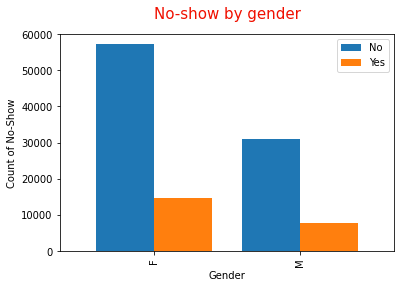

In [27]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
ax= df.groupby(['gender','no_show'])['gender'].count().unstack().plot.bar(width= .8);
plt.title('No-show by gender', fontdict={'size':15, 'color':"#F01000"},pad=15)
plt.xlabel('Gender')
plt.ylabel('Count of No-Show')
plt.legend(['No', 'Yes']);

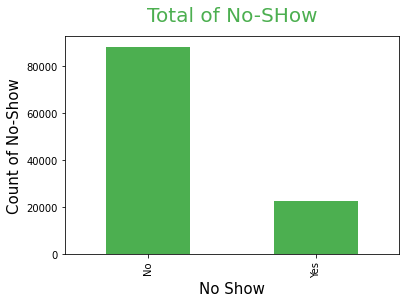

In [28]:
# ax = df.groupby('no_show')['appointmentid'].count().plot.bar(color="#4CAF50");
# plt.title('Total of No-Show',fontdict={'size':20, 'color':'#4CAF50'},pad=15)
# plt.xlabel('No Show',fontdict={'size':15})
# plt.ylabel('Count of No-show',fontdict={'size':12});
plot_bar('no_show','appointmentid','Total of No-SHow','No Show', 'Count of No-Show')

With the above bar chat it is very obvious that more people showed up for their appointment than does that did not

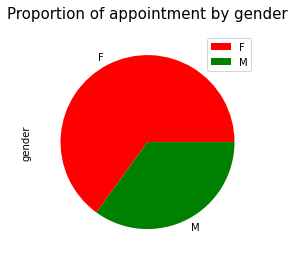

In [29]:
df.groupby(['gender'])['gender'].count().plot(kind='pie',colors=["red","green"])
plt.title('Proportion of appointment by gender',fontdict={'size':15},pad=15);
plt.legend(loc="upper right");

In [30]:
total_female= df.query('gender=="F"').shape[0] # Total female that has appointment
total_male= df.query('gender=="M"').shape[0] # Total male that has appointment
print('The total of female that has appointment is {} and the total male thata has appointment is {}'.format(total_female,total_male))

The total of female that has appointment is 71839 and the total male thata has appointment is 38687


From the plot above it is to show that the number of female that have appointment are far male that have appointment hence it shoulf be expexted that the number of female that showed up are more than that of male

Let go further by checking the percent of of that showed up by gender

<b id='one'>Fig 1.0<b/>

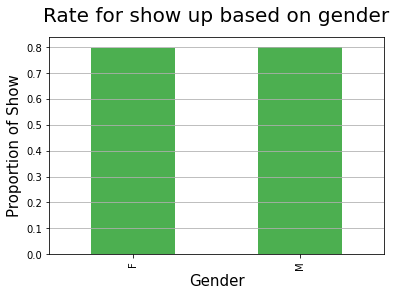

In [31]:

total_show=df.query('no_show=="No"').groupby('gender')['appointmentid'].count() #getting the total that showed up based on gender
total = df.groupby('gender')['appointmentid'].count() #assigning the total count of the data based on gender
plot_propotion_bar(total_show/total,'Rate for show up based on gender',"Gender","Proportion of Show")

From the visual above we can see that female and male showed up that the same rate even thou we have female patient having appointment than the male yet they still show up at 80% rate

### Research Question 2: Does hypertensive, diabetic and alcoholism patient has tendency to show up than other patient?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


#### Hypertension

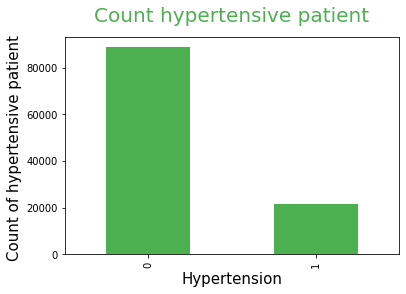

In [32]:
plot_bar('hypertension','appointmentid','Count hypertensive patient','Hypertension','Count of hypertensive patient ')

In [33]:
df.query('hypertension==1').shape

(21801, 17)

From the above we 21 thousand patient who have hypertension

<b id="two"> Fig 2.0<b/>

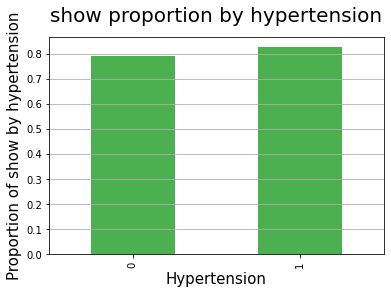

In [34]:
total_show=df.query('no_show=="No"').groupby('hypertension').size() # number to total patient that show groped by hypertensive of not
total = df.groupby('hypertension').size() # getting the total count grouped by hypertension
plot_propotion_bar(total_show/total,'show proportion by hypertension','Hypertension',"Proportion of show by hypertension")

From above more than 80% people who are hypertensive showed up whereas less than 80% who are not showed up therefore hypertensive patient are likely to showed up and this can help in predicting those that are likely to show up for appointmnet

#### Diabetes

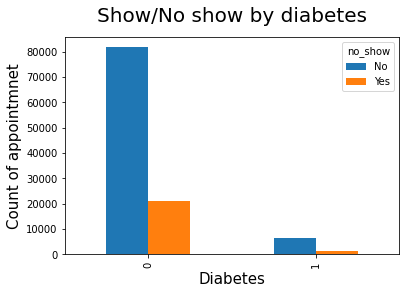

In [35]:
ax= df.groupby(['diabetes','no_show'])['no_show'].count().unstack().plot.bar() #plotting total appointment grouped by diabetes and show/no-show
plt.title('Show/No show by diabetes',fontdict={'size':20},pad=15) # Adding title to the visual and increasing the font size
plt.xlabel('Diabetes',fontdict={'size':15}); # adding label to the x-axis and increasing the font size
plt.ylabel('Count of appointmnet',fontdict={'size':15});

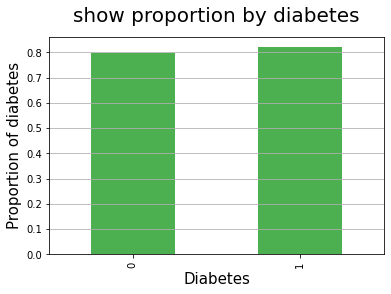

In [36]:
total_show=df.query('no_show=="No"').groupby('diabetes').size() # to show grouped by diabetes patient
total = df.groupby('diabetes').size() #total appointment group by diabetes
plot_propotion_bar(total_show/total,'show proportion by diabetes','Diabetes',"Proportion of diabetes")

From the above visual we can see that above 80% of diabetes patience showes up and 80% of those that are not showed up, with this we can conclude that diabetic patience are likely to showed up and this can help to predict if a patient will showed up or not 

#### Alcoholism

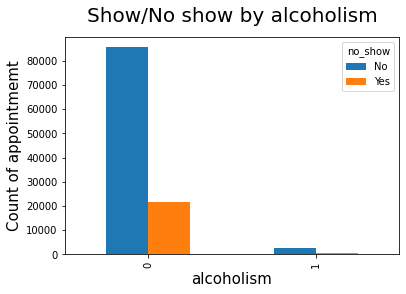

In [37]:
ax=df.groupby(['alcoholism','no_show'])['no_show'].count().unstack().plot.bar() # plotting total appointment grouped by alcoholisma and no-show
plt.title('Show/No show by alcoholism',fontdict={'size':20}, pad=15) # adding title to the visual and increase the size to 20
plt.xlabel('alcoholism',fontdict={'size':15}) # adding label to the viusal and increase the size to 15
plt.ylabel('Count of appointmemt',fontdict={'size':15});

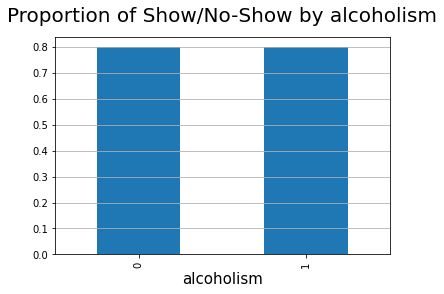

In [38]:
total_show=df.query('no_show=="No"').groupby('alcoholism').size() #total show group by alcoholism
total = df.groupby('alcoholism').size() #total appointment group bu alcoholism
ax=(total_show/total).plot(kind='bar', label=('No', 'Yes')) # proportion of of show alcoholism patints
plt.grid(axis='y') # grid line to the y-axis to see distict difference
plt.title('Proportion of Show/No-Show by alcoholism',fontdict={'size':20}, pad=15) #adding title to the visual
plt.xlabel('alcoholism',fontdict={'size':15}); # adding label to x-axis

The rate at which those who are acoholism and those who are not are the same as we can see that they are both 80% hence this has no effect weather a patient will come or not

### Research Question 3: Do people come for appointment some days of the week than others?

Now let check how people appointment is based on week days

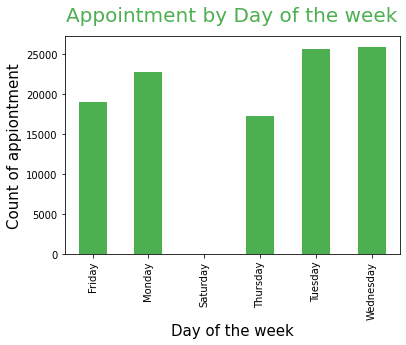

In [39]:
# ax =df.groupby('appointmentday_DN')['appointmentid'].count().plot.bar(color = "#4CAF50", figsize=((10,4)))
# plt.title('Appointment by Day of the week', pad=13, fontdict={'size':20, 'color':'#4CAF5F'})
# plt.xlabel("Day of the week", fontdict={'size':15})
# plt.ylabel("Count of appiontment", fontdict={"size":15});
plot_bar('appointmentday_DN','appointmentid','Appointment by Day of the week',"Day of the week","Count of appiontment")


Let see how people showed up based on day of the week

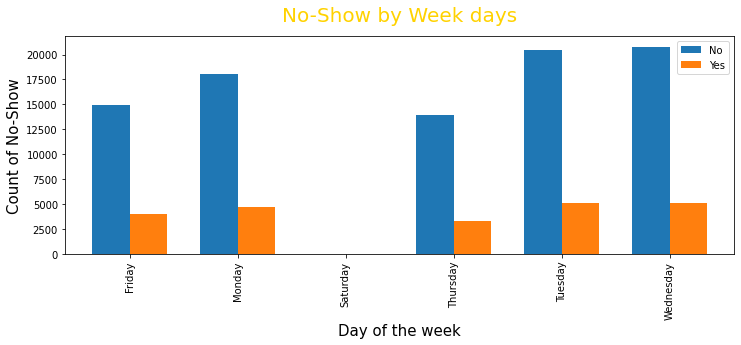

In [40]:
ax= df.groupby(['appointmentday_DN','no_show'])['appointmentid'].count().unstack().plot.bar(figsize=(12,4),width=.7)
plt.title('No-Show by Week days',pad=15,fontdict={'size':20, 'color':'#ffd200'})
plt.xlabel("Day of the week", fontdict={"size":15})
plt.ylabel("Count of No-Show", fontdict={"size":15})
plt.legend(loc='upper right');

Seem there is no actual days that people show up for appointment than than the others but people do have appointment more on `Tuesday` and `Wednesday` and they have less on `Saturday`. Also there is no appointment on `Sunday`

For clarrification let see the proportion at which people show up for appointment

<b id="three">Fig 3.0</b>

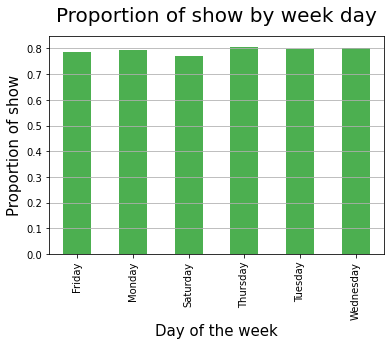

In [43]:
total_show= df.query('no_show=="No"').groupby(['appointmentday_DN']).size()
total= df.groupby('appointmentday_DN').size()
plot_propotion_bar(total_show/total,'Proportion of show by week day',"Day of the week",'Proportion of show')

From above we than see no actual pattern on days that people show for appointment than the other but we can just conclude that there is more appointment on Tuesday and Wednesday

<a id='conclusions'></a>
## Conclusions
>**Are female more showing up than male?**: after exploring the data with visual <a href= '#one'>Here</a> based on proportion of gender that showed up we clear see the 80% of each gender showed up for appointment hence we concluded that no gender showed up than the other.

>**Does hypertensive, diabetic and alcoholism patient has tendency to show up than other patient?**: after exploring the dataset with visua(bar chat) <a href= "#two">Here</a> we can see that there is more tendency that hypertensive and diabetic patients will show up than others but patient with alcoholism has no tendency to show uo than others.

>**Do people show up some days than the others? do people show up mid-week than weekend?**: with the visual <a href="#three">here</a> we can conclude that no pattern in which patient show than the others although we detect that there are many appointment on Tuesday and Wednesday but based on proportion on those that showed up there is no significant different between the days.

### Limitation
<ol>
    <li>This project does not cover causes of any of the illness such as hypertension and diabestes</li>
    <li>In this projecy we do not recommend treating of this above illness as well</li>
 </ol>

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1